## Problem Statement:

### classify the Size_Categorie using SVM

### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore")

### Reading the csv file

In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### Checking null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### Drop the columns that are already one hot encoded from the original data, since it just increases the dimesion of the data

In [4]:
df1 = df.drop(df.columns[11:30], axis = 1  )

In [5]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


### Cheking if the data is normally distributed, using distplot

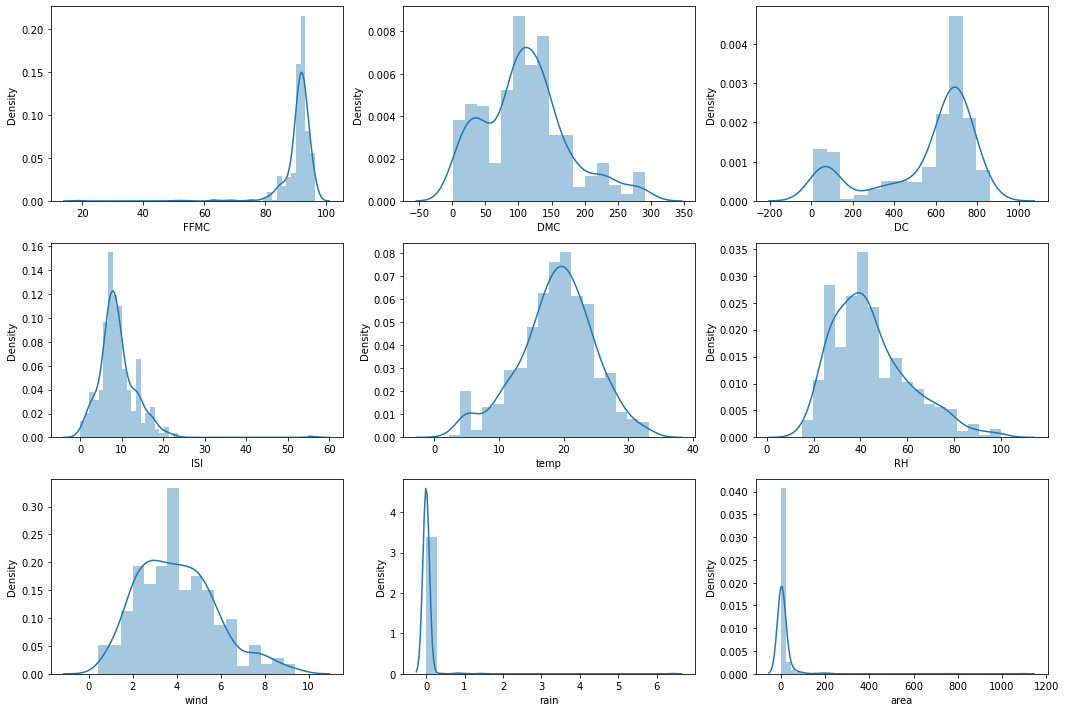

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.distplot(df1.FFMC, ax=ax[0,0])
sns.distplot(df1.DMC, ax=ax[0,1])
sns.distplot(df1.DC, ax=ax[0,2])
sns.distplot(df1.ISI, ax=ax[1,0])
sns.distplot(df1.temp, ax=ax[1,1])
sns.distplot(df1.RH, ax=ax[1,2])
sns.distplot(df1.wind, ax=ax[2,0])
sns.distplot(df1.rain, ax=ax[2,1])
sns.distplot(df1.area, ax=ax[2,2])

plt.tight_layout()
plt.show()

### Checking of outliers in the data using boxplot

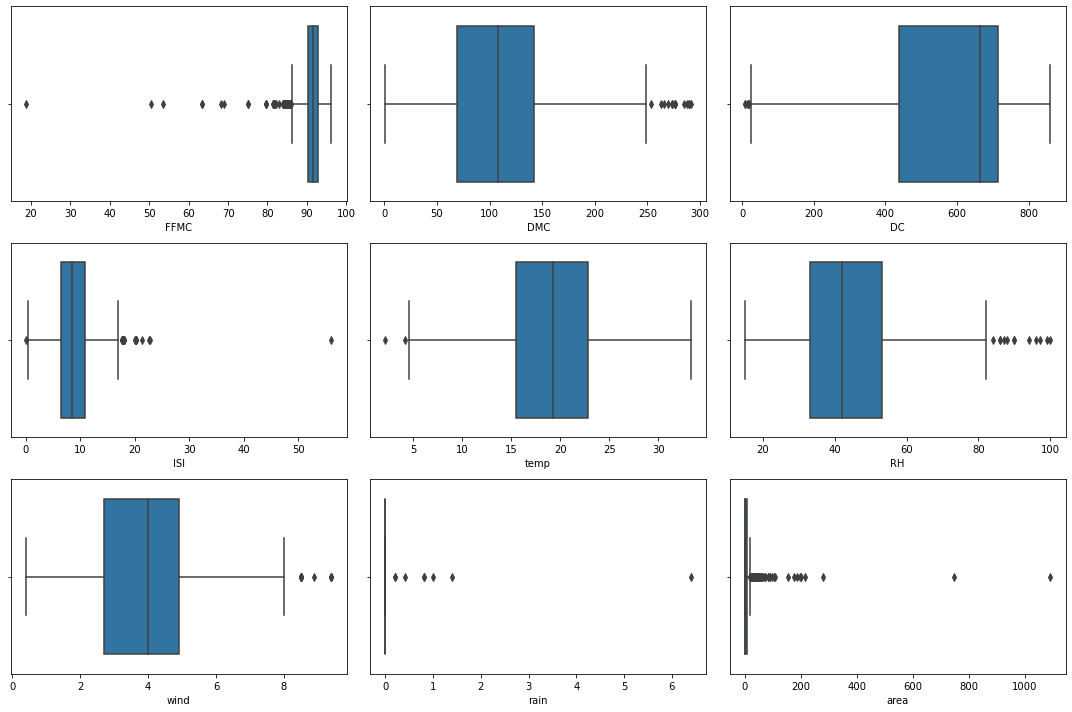

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.boxplot(df1.FFMC, ax=ax[0,0])
sns.boxplot(df1.DMC, ax=ax[0,1])
sns.boxplot(df1.DC, ax=ax[0,2])
sns.boxplot(df1.ISI, ax=ax[1,0])
sns.boxplot(df1.temp, ax=ax[1,1])
sns.boxplot(df1.RH, ax=ax[1,2])
sns.boxplot(df1.wind, ax=ax[2,0])
sns.boxplot(df1.rain, ax=ax[2,1])
sns.boxplot(df1.area, ax=ax[2,2])


plt.tight_layout()
plt.show()

### Coverting the catergorical features into numerical features using label encoding for the data

In [8]:
label_encoder=preprocessing.LabelEncoder()
df1["size_category"]=label_encoder.fit_transform(df1["size_category"])

In [9]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


### Coverting catergorical values of days and months into the integers

In [10]:
df1.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True )
df1.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [11]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


### Checking the newdata

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int32  
dtypes: float64(8), int32(1), int64(3)
memory usage: 46.6 KB


### Extracting the independent and dependent variables

In [13]:
X = df1.iloc[:,0:11].values
Y = df1.iloc[:,-1].values

In [14]:
X

array([[ 3.  ,  5.  , 86.2 , ...,  6.7 ,  0.  ,  0.  ],
       [10.  ,  2.  , 90.6 , ...,  0.9 ,  0.  ,  0.  ],
       [10.  ,  6.  , 90.6 , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 8.  ,  7.  , 81.6 , ...,  6.7 ,  0.  , 11.16],
       [ 8.  ,  6.  , 94.4 , ...,  4.  ,  0.  ,  0.  ],
       [11.  ,  2.  , 79.5 , ...,  4.5 ,  0.  ,  0.  ]])

In [15]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

### Splitting the dataset into training and test set.  

In [16]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.30, random_state=30)  

In [17]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((361, 11), (361,), (156, 11), (156,))

## Grid Search CV

### Constructing a SVM model with Kernel rbf and running it on the grid search to identify the best values

In [18]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [19]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7367867867867868)

### Constructing an SVM model with the best values that is obtained from the Gridsearch CV

In [20]:
clf = SVC(C= 15, gamma = 0.5)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 74.35897435897436


array([[  2,  40],
       [  0, 114]], dtype=int64)

### Constructing a SVM model with Kernel rbf and running it on the grid search to identify the best values with different gamma and C values

In [21]:
clf1 = SVC()
param_grid1 = [{'kernel':['rbf'],'gamma':[5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv1 = GridSearchCV(clf1,param_grid1,cv=10)
gsv1.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['rbf']}])

In [22]:
gsv1.best_params_ , gsv1.best_score_ 

({'C': 15, 'gamma': 0.05, 'kernel': 'rbf'}, 0.7451201201201202)

### Constructing an SVM model with the best values that is obtained from the above Gridsearch CV

In [23]:
clf1 = SVC(C= 15, gamma = 0.05)
clf1.fit(X_train , Y_train)
y_pred = clf1.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 74.35897435897436


array([[  3,  39],
       [  1, 113]], dtype=int64)

### Polynomial Kernel

In [24]:
clf2 = SVC()
param_grid2 = [{'kernel':['poly'],'gamma':[50,5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv2 = GridSearchCV(clf2,param_grid2,cv=10)
gsv2.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['poly']}])

In [25]:
gsv2.best_params_ , gsv2.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'poly'}, 0.9722222222222221)

### Constructing an SVM model with the best values that is obtained from the above Gridsearch CV with polynomial kernel

In [26]:
clf2 = SVC(C= 15, gamma = 50, kernel = "poly")
clf2.fit(X_train , Y_train)
y_pred = clf2.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 96.15384615384616


array([[ 39,   3],
       [  3, 111]], dtype=int64)

### Sigmoid Kernel

In [27]:
clf3 = SVC()
param_grid3 = [{'kernel':['sigmoid'],'gamma':[30,50,5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv3 = GridSearchCV(clf3,param_grid3,cv=10)
gsv3.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [30, 50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['sigmoid']}])

In [28]:
gsv3.best_params_ , gsv3.best_score_

({'C': 15, 'gamma': 30, 'kernel': 'sigmoid'}, 0.7313063063063063)

### Constructing an SVM model with the best values that is obtained from the above Gridsearch CV with sigmoid kernel

In [29]:
clf3 = SVC(C= 15, gamma = 30, kernel = "sigmoid")
clf3.fit(X_train , Y_train)
y_pred = clf3.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 73.07692307692307


array([[  0,  42],
       [  0, 114]], dtype=int64)

## Conclusion:
### Its is eveident that the SVM with Polynomial Kernel, gives better result when compared to others
### So, we can use a polynomial kerenel in SVM, to classify the area of forest fire with a higher accuracy